In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 载入数据
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(
    X.shape, y[y==1].shape[0], y[y==0].shape[0]))
print(cancer.data[0])

data shape: (569, 30); no. positive: 357; no. negative: 212
[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
   1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
   2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
   8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
   5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
   2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
   1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
   4.60100000e-01   1.18900000e-01]


In [12]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='|S23')

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
# 模型训练
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('train score: {train_score:.6f}; test score: {test_score:.6f}'.format(
    train_score=train_score, test_score=test_score))

train score: 0.953846; test score: 0.973684


In [5]:
# 样本预测
y_pred = model.predict(X_test)
print('matchs: {0}/{1}'.format(np.equal(y_pred, y_test).shape[0], y_test.shape[0]))

matchs: 114/114


In [6]:
# 预测概率：找出低于 90% 概率的样本个数
y_pred_proba = model.predict_proba(X_test)
print('sample of predict probability: {0}'.format(y_pred_proba[0]))
y_pred_proba_0 = y_pred_proba[:, 0] > 0.1 
result = y_pred_proba[y_pred_proba_0]
y_pred_proba_1 = result[:, 1] > 0.1
print(result[y_pred_proba_1])

sample of predict probability: [  1.00000000e+00   2.13344552e-47]
[[ 0.14162628  0.85837372]
 [ 0.77498894  0.22501106]
 [ 0.72147347  0.27852653]
 [ 0.14436391  0.85563609]
 [ 0.35342587  0.64657413]
 [ 0.89676523  0.10323477]
 [ 0.1337727   0.8662273 ]
 [ 0.1709261   0.8290739 ]
 [ 0.16402016  0.83597984]
 [ 0.79657204  0.20342796]
 [ 0.76368522  0.23631478]]


In [15]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 增加多项式预处理
def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])
    return pipeline

model = polynomial_model(degree=2, penalty='l1')

start = time.clock()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('elaspe: {0:.6f}; train_score: {1:0.6f}; cv_score: {2:.6f}'.format(
    time.clock()-start, train_score, cv_score))

elaspe: 0.532549; train_score: 1.000000; cv_score: 0.973684


In [16]:
logistic_regression = model.named_steps['logistic_regression']
print('model parameters shape: {0}; count of non-zero element: {1}'.format(
    logistic_regression.coef_.shape, 
    np.count_nonzero(logistic_regression.coef_)))

model parameters shape: (1, 495); count of non-zero element: 94


elaspe: 15.587002


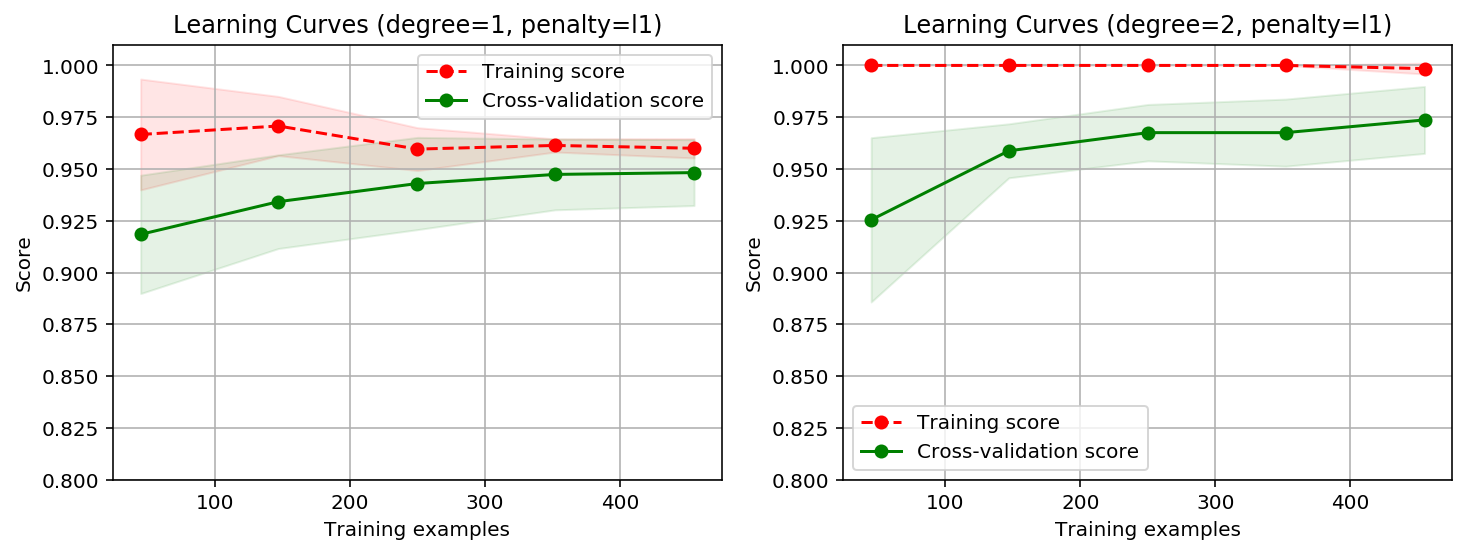

In [9]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves (degree={0}, penalty={1})'
degrees = [1, 2]
penalty = 'l1'

start = time.clock()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty), 
                        title.format(degrees[i], penalty), X, y, ylim=(0.8, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.clock()-start))

elaspe: 4.445942


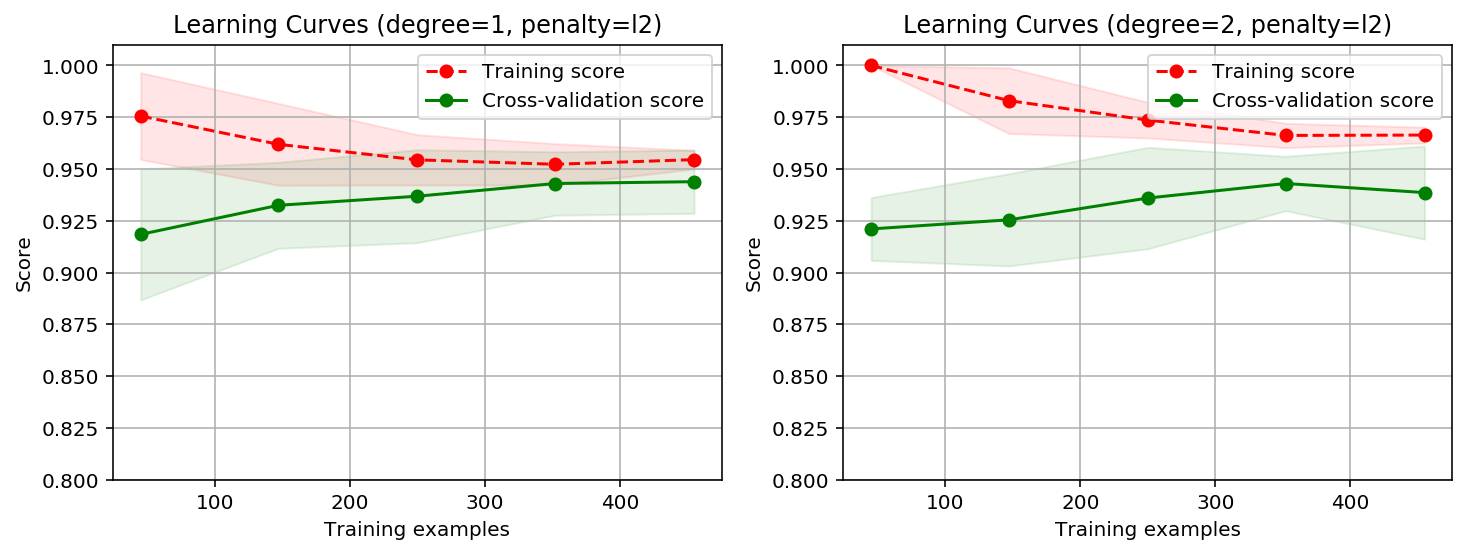

In [10]:
penalty = 'l2'

start = time.clock()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty, solver='lbfgs'), 
                        title.format(degrees[i], penalty), X, y, ylim=(0.8, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.clock()-start))